In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGES_PATH = 'data/images/'

In [3]:
image = io.imread('../' + IMAGES_PATH + 'barcode-00-01.jpg')

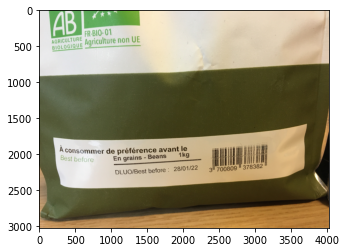

In [4]:
plt.imshow(image)

In [5]:
image = np.array(image).mean(axis=2).astype(np.uint8)

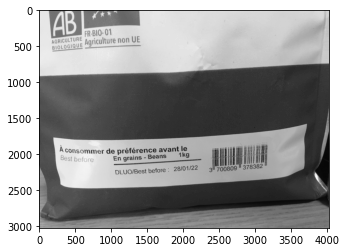

In [6]:
plt.imshow(image, cmap='gray')

In [7]:
tiles = []
n_cols = len(image[0])
n_rows = len(image)

for i in range(0, n_rows, 16):
    for j in range(0, n_cols, 16):
        tiles.append(image[i:i+16, j:j+16])

In [8]:
index_table = [(0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1)]
padding_row = np.zeros(18).astype(np.uint8).tolist()

In [9]:
a = 0
b = 13
a = a | int(b > 12) << 1 # 1 sera remplace par i
a

2

In [10]:
def compute_lbp_value(lbp_window):
    lbp_value = 0
    pixel_value = lbp_window[1][1]
    for i in range(8):
        row_index, col_index = index_table[i]
        #print('index value', lbp_window[row_index, col_index])
        lbp_value = lbp_value | (int(lbp_window[row_index][col_index] >= pixel_value) << i)
        #print('lbp_value', lbp_value)
        
    return lbp_value

In [11]:
def pad_tile(tile):
    tileList = tile.tolist()
    
    for i in range(16):
        tileList[i].insert(0, 0)
        tileList[i].append(0)
    tileList.insert(0, padding_row)
    tileList.append(padding_row)    
    return np.array(tileList)

In [12]:
tileTest = pad_tile(tiles[0])

In [13]:
print(tileTest)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 225 226 228 229 229 228 227 226 230 230 229 228 227 227 228 229   0]
 [  0 225 226 227 228 228 228 228 227 230 230 229 228 227 227 228 229   0]
 [  0 225 226 226 227 227 228 228 228 228 229 230 229 228 228 228 229   0]
 [  0 227 227 227 227 227 228 229 229 228 228 230 229 229 228 229 229   0]
 [  0 227 227 227 227 228 228 229 230 228 228 229 228 228 227 228 228   0]
 [  0 228 227 228 227 228 228 229 230 228 229 229 228 227 227 227 228   0]
 [  0 227 227 227 227 227 228 229 229 229 229 228 227 226 226 227 228   0]
 [  0 226 226 226 227 227 228 228 229 229 229 228 227 226 226 227 228   0]
 [  0 226 226 225 225 225 227 228 229 228 229 228 228 227 227 229 230   0]
 [  0 226 226 226 226 226 227 227 228 229 229 228 227 227 227 228 229   0]
 [  0 227 227 227 227 226 227 227 227 230 229 229 227 227 226 227 228   0]
 [  0 228 228 227 227 226 227 227 228 230 230 229 227 227 226 226 227   0]
 [  0 229 228 227 226 227

In [14]:
compute_lbp_value(tileTest)

14

In [15]:
compute_lbp_value(tileTest[0:3, 0:3])

14

In [16]:
tileTest[1,1]

225

In [17]:
histo_list = []

for tile in tiles:
    padded_tile = pad_tile(tile)
    lbp_histo = [0 for i in range(256)]
    
    for i in range(1, 17):
        for j in range(1, 17):
            window = padded_tile[i-1:i+2, j-1:j+2]
            lbp_histo[compute_lbp_value(window)] += 1    
            
    histo_list.append(lbp_histo)# / np.max(lbp_histo))
    
    

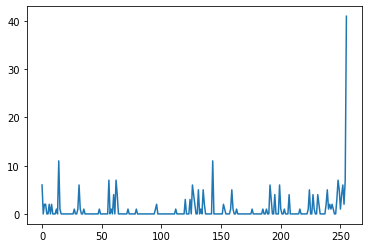

41


In [18]:
plt.plot(histo_list[0])
plt.show()
print(np.max(histo_list[0]))

In [19]:
from sklearn.cluster import KMeans

In [20]:
print(len(histo_list) / len(tiles))

1.0


In [21]:
histo = np.array(histo_list)

In [22]:
histo.shape

(47628, 256)

In [23]:
histo[1000]

array([ 3,  0,  0,  1,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  2,  3,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  5,  4,  3,  0,
        3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  5,  0,  2,  0,  2,  0, 10,  3,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  5,  0,  6,  2,  1,  1,  0,  3,  0,  0,  0,  4,
        0,  0,  0,  1,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  0,  4,  2,  0,  0,  5,  0,  0,  0,  3,  0,  0,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  3,  4

In [24]:
n_cluster=16

In [25]:
kmeans = KMeans(n_clusters=n_cluster, random_state=128).fit(histo)

In [26]:
transformed = kmeans.predict(histo)

In [27]:
print(transformed.shape)

(47628,)


In [28]:
transformed_reshape = transformed.reshape(image.shape[0] // 16, image.shape[1] // 16)

In [29]:
transformed_reshape.shape

(189, 252)

In [30]:
print(transformed_reshape)

[[ 2  2  7 ... 14  2 11]
 [13  7  2 ... 14 11 13]
 [13  2 13 ... 14 13 11]
 ...
 [ 4  8  4 ...  3  3  0]
 [ 3 12 12 ...  4  4  4]
 [ 4  4  4 ... 11  9 11]]


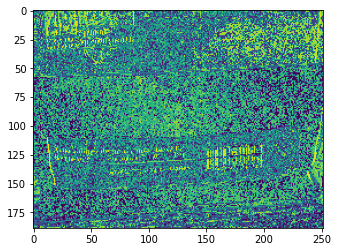

In [31]:
plt.imshow(transformed_reshape)

In [32]:
import matplotlib.cm as cm


In [33]:
def random_lut(n_values):
    '''Build a random LUT for `n_values` elements (sequential integers).'''
    samples = np.linspace(0, 1, n_values)  # take n_values values between 0 and 1 (evenly spaced)
    rng = np.random.default_rng(3)  # get a RNG with a specific seed
    samples = rng.permutation(samples)  # shuffle our values
    colors = cm.hsv(samples, alpha=None, bytes=True)  # get corresponding colors from the HSV color map
    return colors[...,:3]  # remove alpha channel and return

In [34]:
lut = random_lut(n_cluster)

In [35]:
recolored = lut[transformed_reshape]
recolored.shape

(189, 252, 3)

In [36]:
def show_image_seg(img, recolored, n_clusters):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original image")
    plt.subplot(1,2,2)
    plt.imshow(recolored)
    plt.title(f"Segmented areas (with spatial info), {n_clusters} clusters")

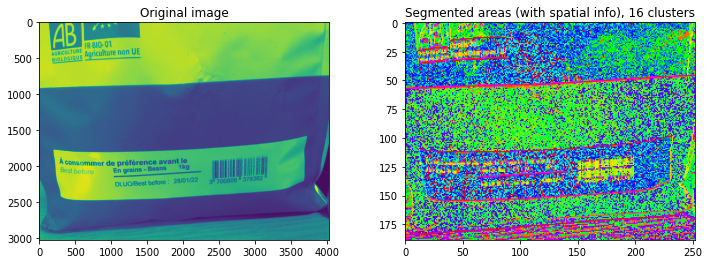

In [37]:
show_image_seg(image, recolored, n_cluster)

In [38]:
kmeans.cluster_centers_.shape

(16, 256)

In [39]:
transformed.shape

(47628,)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=16, metric="euclidean")
neigh.fit(histo, transformed)


KNeighborsClassifier(metric='euclidean', n_neighbors=16)

In [41]:
neigh_prediction = neigh.predict(histo)

In [42]:
neigh_prediction.shape

(47628,)

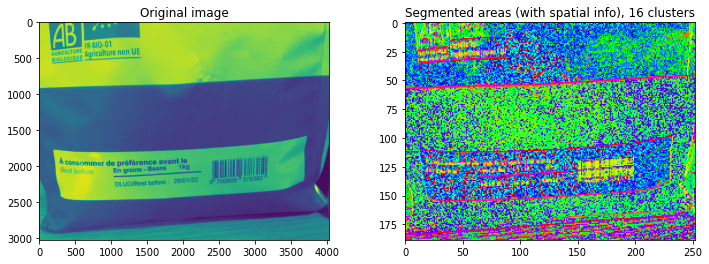

In [43]:
neighbor_recolored = lut[neigh_prediction.reshape(image.shape[0] // 16, image.shape[1] // 16)]


show_image_seg(image, neighbor_recolored, n_cluster)

In [44]:
from sklearn.neighbors import NearestCentroid
search_engine = NearestCentroid();
# Fit sur ton tableau d'histogramme
search_engine.fit(histo, transformed);
#distance, results = search_engine.kneighbors(histo, n_neighbors=16);

neighbor_prediction = search_engine.predict(histo)

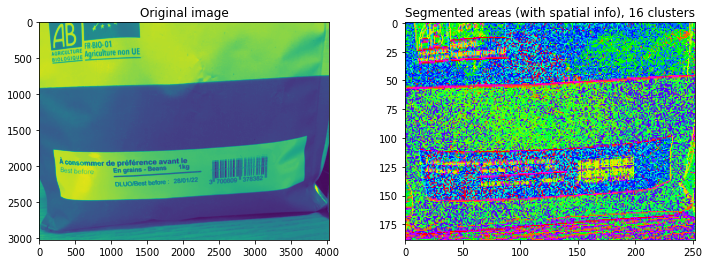

In [45]:
neighbor_recolored = lut[neighbor_prediction.reshape(image.shape[0] // 16, image.shape[1] // 16)]


show_image_seg(image, neighbor_recolored, n_cluster)

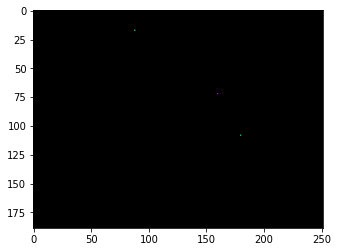

In [46]:
diff = neighbor_recolored - recolored
plt.imshow(diff, cmap='gray')

In [47]:
from sklearn.neighbors import NearestNeighbors

search_engine = NearestNeighbors()
# Fit sur ton tableau d'histogramme
search_engine.fit(histo)
distance, results = search_engine.kneighbors(histo, n_neighbors=16)

In [48]:
distance.shape, results.shape, histo.shape

((47628, 16), (47628, 16), (47628, 256))

In [49]:
print(distance[0])
print(results[0])

[ 0.         14.83239697 15.16575089 15.42724862 15.42724862 15.49193338
 15.49193338 15.49193338 15.55634919 15.62049935 15.68438714 15.74801575
 15.74801575 15.74801575 15.8113883  15.8113883 ]
[    0 33469   183 11076  1450  5564  1139  9334 34615  2461  8482 32736
  5309 10250 33734  8857]


In [50]:
histo[16648]

array([ 9,  0,  3,  4,  0,  0,  2,  2,  4,  0,  0,  1,  1,  0,  7,  5,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  2,  0,  3,  6,  5,  0,
        1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  6,  0,  0,  1,  3,  0,  2,  3,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,
        1,  9,  0,  0,  0,  4,  0,  3,  1,  6,  2,  1,  3,  0,  0,  0,  9,
        3,  0,  0,  0,  0,  0,  1,  7,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  8,  1,  1,  0,  1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3,  0,  0,  1,  4,  0,  0,  1,  4,  0,  0,  0,  0,
        1,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
        0,  0,  2,  2,  8

In [51]:
histo[0]

array([ 6,  0,  2,  2,  0,  0,  2,  0,  2,  0,  0,  0,  1,  0, 11,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  6,  1,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  7,  0,  1,  0,  4,  0,  7,  4,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  0,  3,  0,  6,  4,  2,  0,  0,  5,  0,  1,  0,  5,
        2,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        1,  0,  0,  0,  0,  1,  5,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  0,  6,  3,  0,  0,  4,  0,  0,  0,  6,  1,  0,  0,  1,
        0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  5,  0

In [52]:
kmeans.cluster_centers_.shape

(16, 256)

In [53]:
kmeans.cluster_centers_

array([[7.53368745e+00, 4.27872519e-01, 3.82289628e+00, ...,
        3.31828348e+00, 1.81660609e+00, 1.43652502e+01],
       [1.93641618e+00, 4.91329480e-02, 1.47182081e+00, ...,
        1.52239884e+00, 5.03612717e+00, 8.47008671e+01],
       [3.50114226e+00, 1.14018692e-01, 2.23343718e+00, ...,
        2.55950156e+00, 4.61225337e+00, 4.10774663e+01],
       ...,
       [4.35820214e+00, 1.72940908e-01, 2.42915811e+00, ...,
        2.61487566e+00, 3.48756559e+00, 2.92610084e+01],
       [7.39213198e+00, 6.80203046e-01, 3.21065990e+00, ...,
        1.15736041e+00, 1.23477157e+00, 1.27081218e+01],
       [6.04012346e+00, 5.92592593e-01, 1.92592593e+00, ...,
        8.33333333e-01, 8.73456790e-01, 1.14567901e+01]])

In [54]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=1, metric='euclidean')
neigh.fit(samples)
print(neigh.kneighbors([[1., 1., 1.]]))

(array([[0.5]]), array([[2]]))


In [55]:
def export_centroids_csv(centroids, delimiter=",", output="centroids.csv"):
    with open(output, 'w') as f:
        for vector in centroids:
            vector_str = [str(nbr) for nbr in vector]
            f.write(delimiter.join(vector_str) + "\n")

In [56]:
export_centroids_csv(kmeans.cluster_centers_.tolist())

In [57]:
results

array([[    0, 33469,   183, ..., 10250, 33734,  8857],
       [    1,  9727,  5798, ..., 10240,  4680, 38116],
       [    2, 37453,  3124, ..., 29808, 38165, 11637],
       ...,
       [47625, 25186, 12595, ..., 34276, 43001, 41697],
       [47626, 15060, 43300, ..., 16297, 20494, 24367],
       [47627, 25327, 25410, ..., 17472, 39713, 46282]])

In [58]:
histo[0]

array([ 6,  0,  2,  2,  0,  0,  2,  0,  2,  0,  0,  0,  1,  0, 11,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  6,  1,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  7,  0,  1,  0,  4,  0,  7,  4,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  0,  3,  0,  6,  4,  2,  0,  0,  5,  0,  1,  0,  5,
        2,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        1,  0,  0,  0,  0,  1,  5,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  0,  6,  3,  0,  0,  4,  0,  0,  0,  6,  1,  0,  0,  1,
        0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  5,  0

In [62]:
first_histo = np.array([5,0,2,1,0,0,2,0,2,0,0,0,1,0,9,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,5,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,3,0,5,4,1,0,0,4,0,1,0,7,2,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,6,3,0,0,4,0,0,1,4,2,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,4,0,1,5,0,0,0,4,2,0,0,0,1,0,2,6,3,1,0,2,0,0,0,3,7,5,1,4,6,2,9,43])

first_histo.shape

(256,)

In [73]:
test = np.zeros(16)

for i, centroid in enumerate(kmeans.cluster_centers_):
    diff = np.linalg.norm(centroid - first_histo)
    test[i] = diff

In [76]:
kmeans.cluster_centers_

array([[7.53368745e+00, 4.27872519e-01, 3.82289628e+00, ...,
        3.31828348e+00, 1.81660609e+00, 1.43652502e+01],
       [1.93641618e+00, 4.91329480e-02, 1.47182081e+00, ...,
        1.52239884e+00, 5.03612717e+00, 8.47008671e+01],
       [3.50114226e+00, 1.14018692e-01, 2.23343718e+00, ...,
        2.55950156e+00, 4.61225337e+00, 4.10774663e+01],
       ...,
       [4.35820214e+00, 1.72940908e-01, 2.42915811e+00, ...,
        2.61487566e+00, 3.48756559e+00, 2.92610084e+01],
       [7.39213198e+00, 6.80203046e-01, 3.21065990e+00, ...,
        1.15736041e+00, 1.23477157e+00, 1.27081218e+01],
       [6.04012346e+00, 5.92592593e-01, 1.92592593e+00, ...,
        8.33333333e-01, 8.73456790e-01, 1.14567901e+01]])

In [75]:
test

array([35.10542615, 45.40081187, 15.10430181, 36.10528689, 39.77754041,
       48.38374534, 87.69481649, 18.27001895, 63.07729464, 33.61919855,
       28.62393437, 28.52020855, 53.63475277, 20.59276882, 39.73115822,
       53.10080124])

In [77]:
results[results == 15].shape

(13,)

In [79]:
from sklearn.neighbors import NearestNeighbors

search_engine = NearestNeighbors()
# Fit sur ton tableau d'histogramme
search_engine.fit(histo)
distance, results = search_engine.kneighbors(histo, n_neighbors=16)

In [80]:
results

array([[    0, 33469,   183, ..., 10250, 33734,  8857],
       [    1,  9727,  5798, ..., 10240,  4680, 38116],
       [    2, 37453,  3124, ..., 29808, 38165, 11637],
       ...,
       [47625, 25186, 12595, ..., 34276, 43001, 41697],
       [47626, 15060, 43300, ..., 16297, 20494, 24367],
       [47627, 25327, 25410, ..., 17472, 39713, 46282]])

In [84]:
prediction = kmeans.predict(histo)
prediction[prediction==8].shape

(587,)

In [85]:
for i in range(16):
    print(prediction[prediction==i].shape)

(7155,)
(1383,)
(4815,)
(2279,)
(1734,)
(745,)
(387,)
(4735,)
(587,)
(6250,)
(3301,)
(8094,)
(668,)
(4383,)
(788,)
(324,)
